#**Modelo de la componente vertical de la gravedad para una esfera**#
###**Alumna: Stephany Ramírez**###
</br>Dada la expresión para la componente vertical de la atracción gravitatoria de una esfera, escriba una subrutina para efectuar su cálculo. Luego genere un mapa de anomalías de gravedad dada por la superposición de dos modelos, según los siguientes parámetros: $Δσ=500\,\,kg/m^3$,$\,\,$$R=200\,\,m$,$\,\,$profundidad$\,\,$de$\,\,$$400 m$,$\,\,$posición de los centros:  $±240\,\,m$. Donde la grilla de observación viene dada por un área de $2.2\,\,km^2$,$\,\,$con$Δx=Δy=27.5\,\,m$.</br>

##**Modelo sintético de la contribución vertical de un cuerpo esférico**##
</br>La componente vertical de la atracción gravitatoria debida a un cuerpo esférico con contraste de densidad $\Delta \sigma$  viene dada por la siguiente expresión:

$g_z(r,r_0)\,\,=\,\,g\cdot \widehat{k}\,\,=\,\,\frac{4}{3}\cdot\pi \cdot R^3\cdot G \Delta \sigma\cdot (\frac{z−z_0}{\sqrt{(x−x_0)^2+(y−y_0)^2+(z−z_0)^2}^3}^)$
 
donde $r=(x,y,z)$ son las coordenadas del punto de observación, $r_0=(x_0,y_0,z_0)$las coordenadas del centro de la esfera, $R$ el radio de la esfera y $r^2=||r−r_0||_2^2=(x−x_0)^2+(y−y_0)^2+(z−z_0)^2$.

In [0]:
#Importo módulos
import matplotlib.pyplot as plt
import numpy as np
import numpy
import sys
from scipy.interpolate import griddata
numpy.set_printoptions(threshold=sys.maxsize)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

###**Defino subrutinas**###

#####**Subrutina para el cálculo de la contribución vertical de una esfera**#####

In [0]:
def g_vert(x,y,z,X0,R,drho):
  #Constante de gravitación universal
  G=6.67408e-11  #m^3/kg.s^2
  #
  #Constante de conversión de m/s^2 a mGal
  conv=1e5
  #
  #Amplitud de la contribución
  ctte=((4/3)*np.pi*(R**3)*drho*G)*conv
  #
  #Contribución
  x0,y0,z0=X0
  g_z=ctte*((z-z0)/(np.sqrt((x-x0)**2+(y-y0)**2+(z-z0)**2)**3))
  #
  return g_z

#####**Subrutina para el cálculo de parámetros estadísticos**#####

In [0]:
def f_stats(x):
  #
  ###############################################
  #Función para calcular parámetros estadísticos#
  mean_x=np.mean(x)        #Media 
  std_x=np.std(x)          #Desviación estandar
  min_x=np.min(x)          #Máximo valor
  max_x=np.max(x)          #Mínimo valor
  ##############################################
  #
  stats_x=(mean_x,std_x,min_x,max_x)
  #
  return stats_x

###**Defino grilla de observación**###

In [0]:
#Defino parámetros de longiud y espaciamiento en x e y:
L      = 1100    #m
nx, ny = (81,81) #m
#
#Defino vector de muestras equiespaciadas desde -L a L, con
#espaciamiento nx y ny:
xx     = np.linspace(-L, L, nx)  #m
yy     = np.linspace(-L, L, ny)  #m
#
#Defino la grilla:
x, y   = np.meshgrid(xx, yy)
#
#Defino arreglo de ceros con la misma longitud que x:
z      = np.zeros_like(x)

###**Defino parámetros del cuerpo y contribución**###

In [0]:
#Parámetros
#
#Contraste de densidad
drho  =500              #kg/m^3
#
#Radio de la esfera
R     =200              #m
#
#Ubicación del/los cuerpos (x0,y0,z0)
X01   =(240,0,-400)     #m
X02   =(-240,0,-400)    #m
#
#Contribuciones
g_z1  =g_vert(x,y,z,X01,R,drho)  #mGal
g_z2  =g_vert(x,y,z,X02,R,drho)  #mGal
g_zt  =g_z1+g_z2                 #mGal
#

###**Parámetros estadísticos**###

In [97]:
#Utilizamos la subrutina para el cálculo de parámetros estadísticos
#de interés
#
stats_1=f_stats(g_z1)
stats_2=f_stats(g_z2)
stats_t=f_stats(g_zt)
#
print("Estadísticos g_z1:","\n","Media:",'{:.3f}'.format(stats_1[0]),
     "\n","Desviación estándar:",'{:.3f}'.format(stats_1[1]),
     "\n","Mínimo",'{:.3f}'.format(stats_1[2]),"\n","Máximo:",'{:.3f}'.format(stats_1[3]))
print()
print("Estadísticos g_z2:","\n","Media:",'{:.3f}'.format(stats_2[0]),
     "\n","Desviación estándar:",'{:.3f}'.format(stats_2[1]),
     "\n","Mínimo",'{:.3f}'.format(stats_2[2]),"\n","Máximo:",'{:.3f}'.format(stats_2[3]))
print()
print("Estadísticos g_zt:","\n","Media:",'{:.3f}'.format(stats_t[0]),
     "\n","Desviación estándar:",'{:.3f}'.format(stats_t[1]),
     "\n","Mínimo",'{:.3f}'.format(stats_t[2]),"\n","Máximo:",'{:.3f}'.format(stats_t[3]))

Estadísticos g_z1: 
 Media: 0.097 
 Desviación estándar: 0.123 
 Mínimo 0.008 
 Máximo: 0.699

Estadísticos g_z2: 
 Media: 0.097 
 Desviación estándar: 0.123 
 Mínimo 0.008 
 Máximo: 0.699

Estadísticos g_zt: 
 Media: 0.194 
 Desviación estándar: 0.205 
 Mínimo 0.023 
 Máximo: 0.906


###**Gráficos de las contribuciones**###

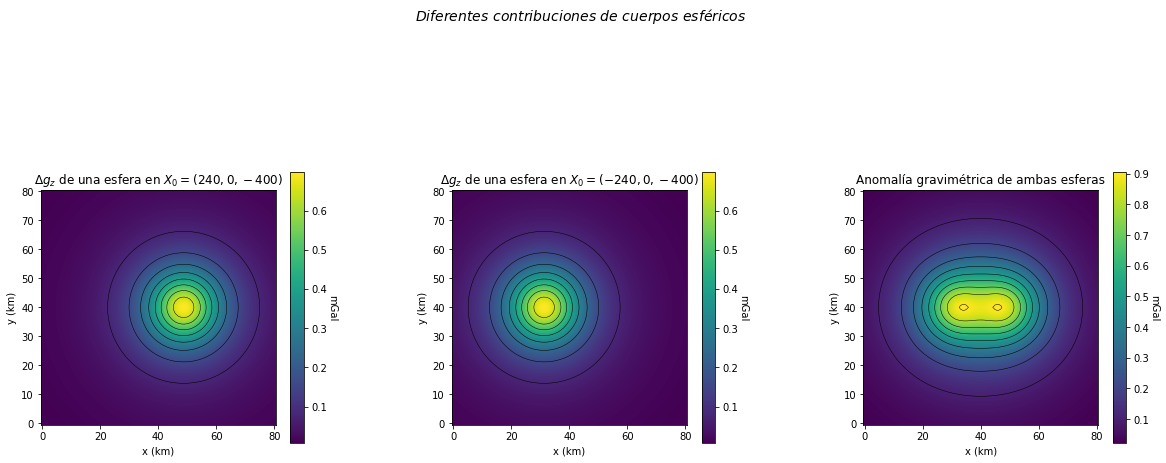

In [98]:
cmap ='viridis'
dat= [g_z1,g_z2,g_zt]
names   = [r'$\Delta g_z$ de una esfera en $X_0=(240,0,-400)$',
           r'$\Delta g_z$ de una esfera en $X_0=(-240,0,-400)$',
           'Anomalía gravimétrica de ambas esferas']

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0, wspace=0.4, top=1)
fig.suptitle('$Diferentes\,\,contribuciones\,\,de\,\,cuerpos\,\,esféricos$',fontsize=14)
#
for ax, dat,names in zip(axes.flat, dat,names):
    ax.contour(dat,10,linewidths=0.5,colors='k')
    im=ax.imshow(dat, origin="lower",interpolation='spline36', cmap=cmap)
    ax.set_title(names)
    ax.set_xlabel("x (km)")
    ax.set_ylabel("y (km)")    
    fig.colorbar(im,ax=ax, shrink=0.43).set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.show()

###**Gráfico 3D para mejorar la visualización de las anomalías**###

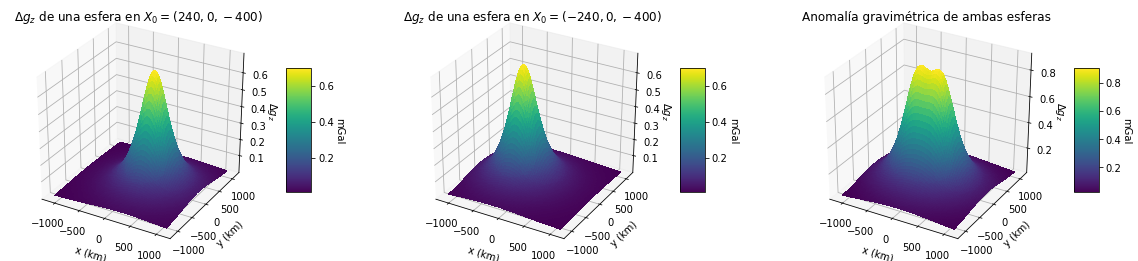

In [108]:
#Genero las superficies 3D
#
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(2, 3, 1, projection='3d')
surf = ax.plot_surface(x, y, g_z1, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")    
ax.zaxis.set_rotate_label(False)  #Cancelo la orientación de la etiqueda por defecto
ax.set_zlabel(r"$\Delta g_z$",labelpad=0,rotation=270)  #Coloco la etiqueta a gusto propio
ax.set_title(r'$\Delta g_z$ de una esfera en $X_0=(240,0,-400)$')
fig.colorbar(surf, shrink=0.5, aspect=5).set_label('mGal',labelpad=10, y=0.5, rotation=270)

ax = fig.add_subplot(2, 3, 2, projection='3d')
surf = ax.plot_surface(x, y, g_z2, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")    
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$\Delta g_z$",labelpad=0,rotation=270)
ax.set_title(r'$\Delta g_z$ de una esfera en $X_0=(-240,0,-400)$')
fig.colorbar(surf, shrink=0.5, aspect=5).set_label('mGal',labelpad=10, y=0.5, rotation=270)

ax = fig.add_subplot(2 ,3, 3, projection='3d')
surf = ax.plot_surface(x, y, g_zt, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")    
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$\Delta g_z$",labelpad=0,rotation=270)
ax.set_title(r'Anomalía gravimétrica de ambas esferas')
fig.colorbar(surf, shrink=0.5, aspect=5).set_label('mGal',labelpad=10, y=0.5, rotation=270)

plt.show()

###**Comentarios**###
</br> Podemos apreciar en los dos primeros gráficos que la anomalía producida por dichos cuerpos es exactamente la misma, con la simple diferencia de un corrimiento en 480 metros del centro de la esfera. Posteriormente, la contribución conjunta de ambas esferas muestra un comportamiento distinto al anterior, ya que se pueden distinguir dos lóbulos en el centro de la anomalía, esto nos permite tener una idea de la posibilidad de existencia de mas de un cuerpo perturbador, esto ultimo es apreciando directamente el producto final, sin pensar que el modelo sintético está justamente basado en el efecto que producen dos esferas a la misma profundidad y separadas una cierta distancia horizontal.</br>
</br>Esta misma tendencia explicada anteriormente, se puede visualizar de mejor manera con cada una de las superficies tridimensionales. En estas últimas, una rápida inspección muestra el ancho de la anomalía y los lóbulos de cada uno de los cuerpos estudiados.</br>

###**Sección final - Duda**###

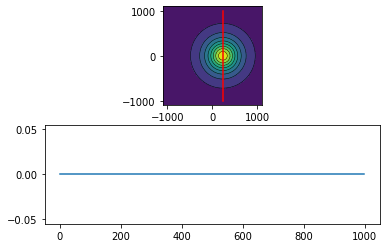

In [114]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


xp1,yp1=240,1000
xp2,yp2=240,-1000
num = 1000
xi, yi = np.linspace(xp1, xp2, num), np.linspace(yp1, yp2, num)
zz = scipy.ndimage.map_coordinates(g_z1.T, np.vstack((xi,yi)))
#zi = scipy.ndimage.map_coordinates(g_z1, np.vstack((xi,yi)))

fig, axes = plt.subplots(nrows=2)
axes[0].contour(x,y,g_z1,10,linewidths=0.5,colors='k')
axes[0].contourf(x,y,g_z1,10,cmap=plt.cm.viridis)
axes[0].plot([xp1, xp2], [yp1, yp2], 'r-')
axes[0].axis('image')

axes[1].plot(zz)

plt.show()



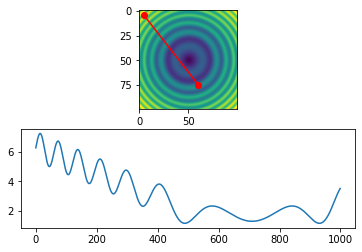

(100, 100)


In [0]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

#-- Generate some data...
x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
z = np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)

#-- Extract the line...
# Make a line with "num" points...
x0, y0 = 5, 4.5 # These are in _pixel_ coordinates!!
x1, y1 = 60, 75
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# Extract the values along the line, using cubic interpolation
zi = scipy.ndimage.map_coordinates(z, np.vstack((x,y)))

#-- Plot...
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()

print(z.shape)